# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [4]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
sns.set_style("whitegrid")

** Read in the csv file as a dataframe called df **

In [6]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [9]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   

                         addr  e Reason  Hour  Month Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  
2                    HAWS AVE  1   Fire    17     12         Thu

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [14]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [16]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [17]:
df['title'].nunique()

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [24]:
df['title'][0].split(':')[0]

'EMS'

In [29]:
df['title'].apply(lambda str: str.split(':')[0]).head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: title, dtype: object

In [30]:
df['reason'] = df['title'].apply(lambda str: str.split(':')[0])

In [34]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

** What is the most common Reason for a 911 call based off of this new column? **

In [35]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

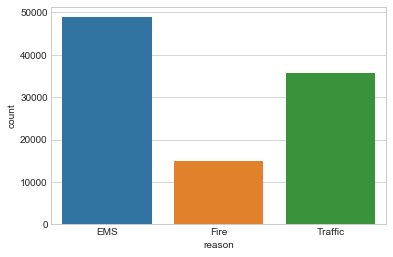

In [38]:
sns.countplot(x='reason',data=df)

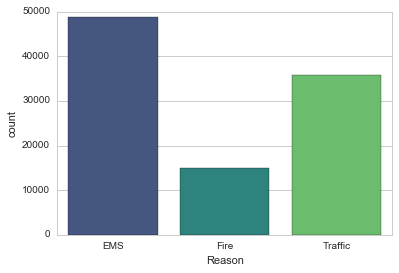

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [40]:
df['timeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [45]:
df['timeStamp'].dtype

dtype('O')

In [87]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [53]:
pd.to_datetime(df['timeStamp']).head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [54]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [59]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [60]:
df['timeStamp'].iloc[0].hour

17

In [61]:
df['timeStamp'].iloc[0].month

12

In [62]:
df['timeStamp'].iloc[0].year

2015

In [63]:
df['timeStamp'].iloc[0].day

10

In [64]:
df['timeStamp'].iloc[0].minute

40

In [65]:
df['timeStamp'].iloc[0].dayofweek

3

In [69]:
df['timeStamp'].iloc[0].day_name()

'Thursday'

In [73]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [74]:
df['month'] = df['timeStamp'].apply(lambda x: x.month)

In [83]:
# df['dayofweek'] = df['timeStamp'].apply(lambda x: x.day_name())
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [84]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month  dayofweek  
0      REINDEER CT & DEAD END  1    EMS    17     12          3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12          3  
2                    HAWS AVE  1   Fire    17     12          3  
3          AIRY ST & SWEDE ST  1    EMS    17     12          3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12          3

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [88]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)
# in this case, the dmap is the function and the series dayofweek is the list. map the function dmap onto the list
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [89]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month dayofweek  
0      REINDEER CT & DEAD END  1    EMS    17     12       Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12       Thu  
2                    HAWS AVE  1   Fire    17     12       Thu  
3          AIRY ST & SWEDE ST  1    EMS    17     12       Thu  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12       Thu

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

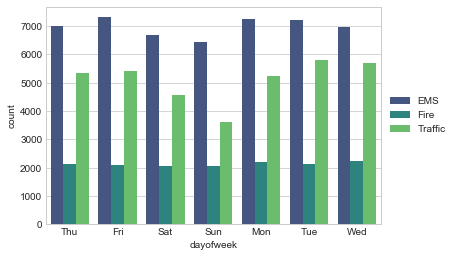

In [93]:
sns.countplot(x='dayofweek',data=df,hue='reason',palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

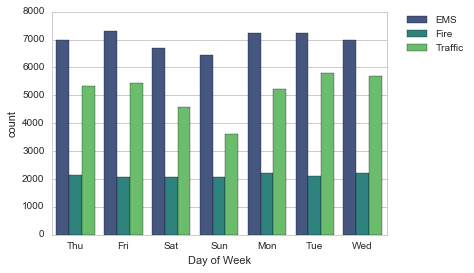

**Now do the same for Month:**

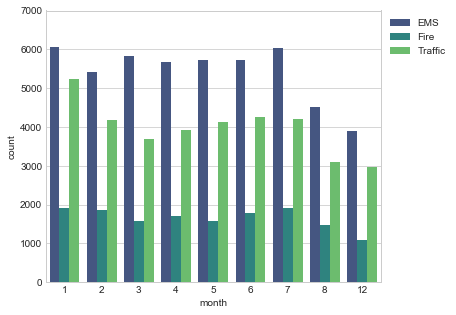

In [135]:
plt.figure(figsize=(6,5))
plt.ylim(0,7000)
sns.countplot(x='month',data=df,hue='reason',palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, .9))

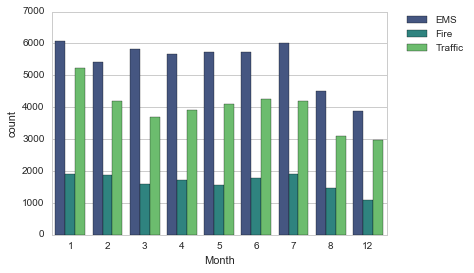

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [142]:
byMonth = df.groupby('month').count()
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       reason   hour  dayofweek  
month                            
1       13205  13205      13205  
2       11467  11467      11467  
3       11101  11101      11101  
4       11326  11326      11326  
5       11423  11423      11423

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

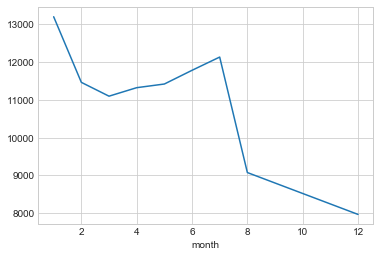

In [143]:
byMonth['lat'].plot()

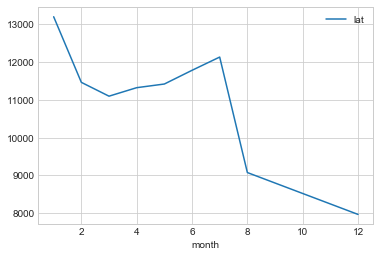

In [145]:
byMonth.plot.line(y='lat')

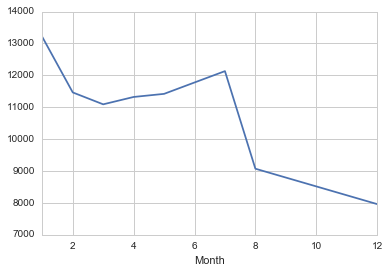

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [147]:
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       reason   hour  dayofweek  
month                            
1       13205  13205      13205  
2       11467  11467      11467  
3       11101  11101      11101  
4       11326  11326      11326  
5       11423  11423      11423

In [149]:
byMonth.reset_index(inplace=True)

In [150]:
byMonth

month    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
0      1  13205  13205  13205  11527  13205      13205  13203  13096  13205   
1      2  11467  11467  11467   9930  11467      11467  11465  11396  11467   
2      3  11101  11101  11101   9755  11101      11101  11092  11059  11101   
3      4  11326  11326  11326   9895  11326      11326  11323  11283  11326   
4      5  11423  11423  11423   9946  11423      11423  11420  11378  11423   
5      6  11786  11786  11786  10212  11786      11786  11777  11732  11786   
6      7  12137  12137  12137  10633  12137      12137  12133  12088  12137   
7      8   9078   9078   9078   7832   9078       9078   9073   9025   9078   
8     12   7969   7969   7969   6907   7969       7969   7963   7916   7969   

   reason   hour  dayofweek  
0   13205  13205      13205  
1   11467  11467      11467  
2   11101  11101      11101  
3   11326  11326      11326  
4   11423  11423      11423  
5   11786  11786      11786  
6   12137  12137      12137  
7    9078   9078       9078  
8    7969   7969       7969

Text(-7.075,0.5,'number of calls')

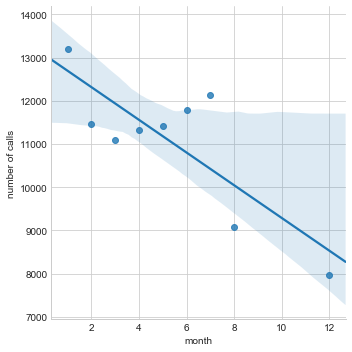

In [153]:
sns.lmplot(x='month',y='lat',data=byMonth)
plt.ylabel('number of calls')

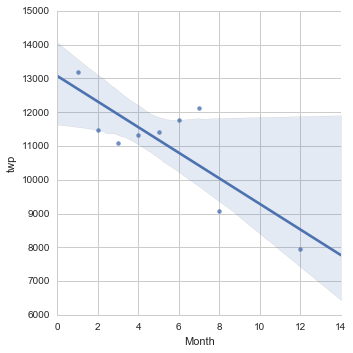

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [154]:
df['timeStamp'][0]

Timestamp('2015-12-10 17:40:00')

In [162]:
df['timeStamp'].apply(lambda x:x.date()).head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: timeStamp, dtype: object

In [163]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())

In [164]:
df.head(1)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title           timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY 2015-12-10 17:40:00  NEW HANOVER   

                     addr  e reason  hour  month dayofweek        date  
0  REINDEER CT & DEAD END  1    EMS    17     12       Thu  2015-12-10

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [169]:
df.groupby('date')['lat'].count().head()

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
Name: lat, dtype: int64

In [170]:
bydate = df.groupby('date')['lat'].count()

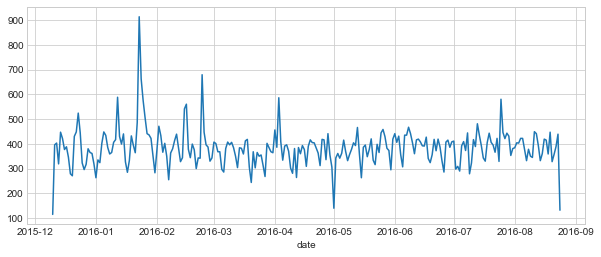

In [175]:
plt.figure(figsize=(10,4))
bydate.plot()

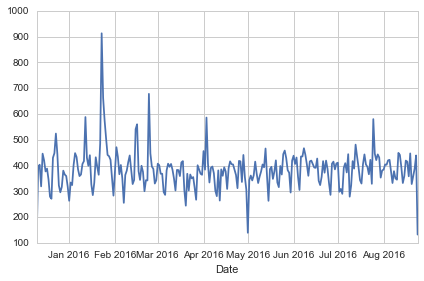

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [191]:
reasons = list(df['reason'].value_counts().index)
reasons

['EMS', 'Traffic', 'Fire']

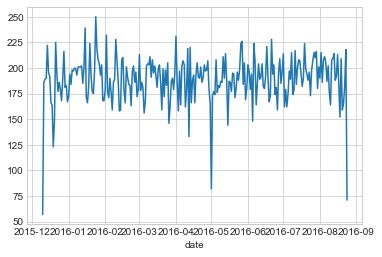

In [193]:
df[df['reason'] == 'EMS'].groupby('date')['lat'].count().plot()

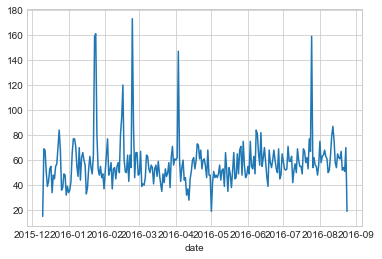

In [195]:
df[df['reason'] == 'Fire'].groupby('date')['lat'].count().plot()

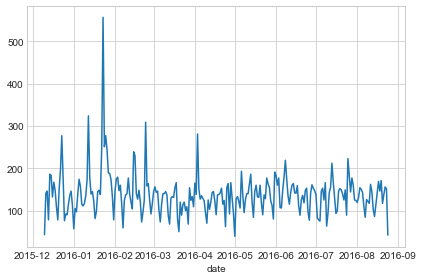

In [201]:
df[df['reason'] == 'Traffic'].groupby('date')['lat'].count().plot()
plt.tight_layout()

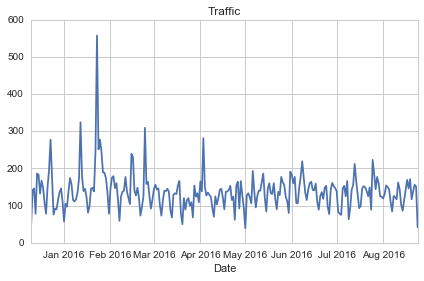

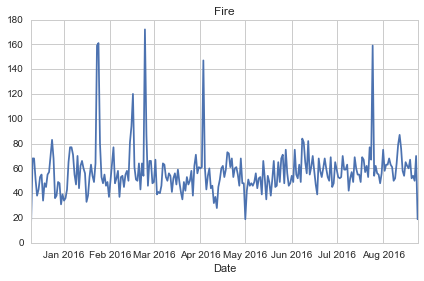

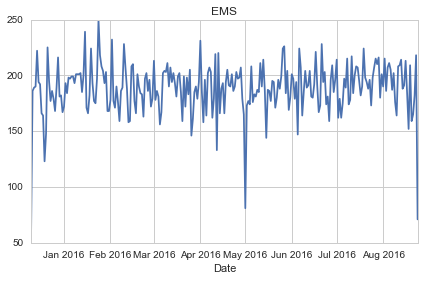

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [198]:
df.head(1)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title           timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY 2015-12-10 17:40:00  NEW HANOVER   

                     addr  e reason  hour  month dayofweek        date  
0  REINDEER CT & DEAD END  1    EMS    17     12       Thu  2015-12-10

In [206]:
df.groupby(['dayofweek','hour']).count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
dayofweek hour                                                                  
Fri       0     275  275   275  248    275        275  275   275  275     275   
          1     235  235   235  200    235        235  235   232  235     235   
          2     191  191   191  165    191        191  191   191  191     191   
          3     175  175   175  164    175        175  175   175  175     175   
          4     201  201   201  184    201        201  201   201  201     201   

                month  date  
dayofweek hour               
Fri       0       275   275  
          1       235   235  
          2       191   191  
          3       175   175  
          4       201   201

In [210]:
df.groupby(['dayofweek','hour'])['reason'].count()

dayofweek  hour
Fri        0        275
           1        235
           2        191
           3        175
           4        201
           5        194
           6        372
           7        598
           8        742
           9        752
           10       803
           11       859
           12       885
           13       890
           14       932
           15       980
           16      1039
           17       980
           18       820
           19       696
           20       667
           21       559
           22       514
           23       474
Mon        0        282
           1        221
           2        201
           3        194
           4        204
           5        267
                   ... 
Tue        18       905
           19       731
           20       647
           21       571
           22       462
           23       274
Wed        0        250
           1        216
           2        189
           3        209


In [209]:
df.groupby(['dayofweek','hour'])['reason'].count().unstack()

hour        0    1    2    3    4    5    6    7    8    9  ...    14   15  \
dayofweek                                                   ...              
Fri        275  235  191  175  201  194  372  598  742  752 ...   932  980   
Mon        282  221  201  194  204  267  397  653  819  786 ...   869  913   
Sat        375  301  263  260  224  231  257  391  459  640 ...   789  796   
Sun        383  306  286  268  242  240  300  402  483  620 ...   684  691   
Thu        278  202  233  159  182  203  362  570  777  828 ...   876  969   
Tue        269  240  186  170  209  239  415  655  889  880 ...   943  938   
Wed        250  216  189  209  156  255  410  701  875  808 ...   904  867   

hour         16    17   18   19   20   21   22   23  
dayofweek                                            
Fri        1039   980  820  696  667  559  514  474  
Mon         989   997  885  746  613  497  472  325  
Sat         848   757  778  696  628  572  506  467  
Sun         663   714  670  655  537  461  415  330  
Thu         935  1013  810  698  617  553  424  354  
Tue        1026  1019  905  731  647  571  462  274  
Wed         990  1037  894  686  668  575  490  335  

[7 rows x 24 columns]

In [212]:
dayhour = df.groupby(['dayofweek','hour'])['reason'].count().unstack()

** Now create a HeatMap using this new DataFrame. **

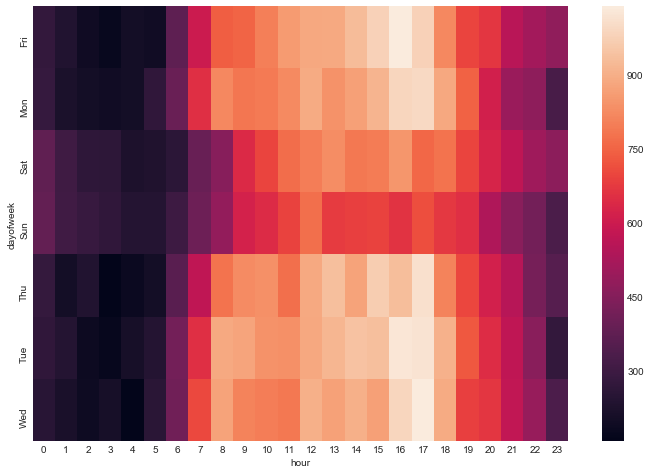

In [218]:
plt.figure(figsize=(12,8))
sns.heatmap(dayhour)

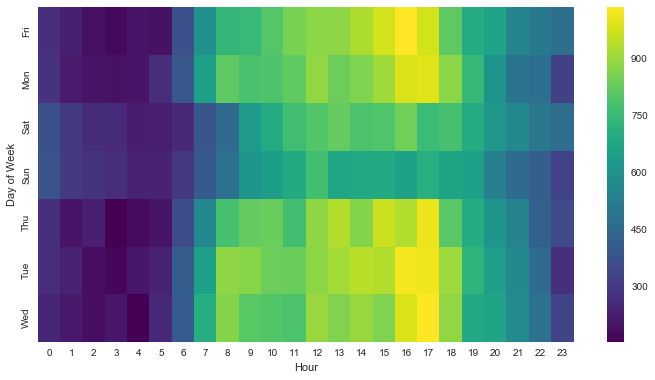

** Now create a clustermap using this DataFrame. **

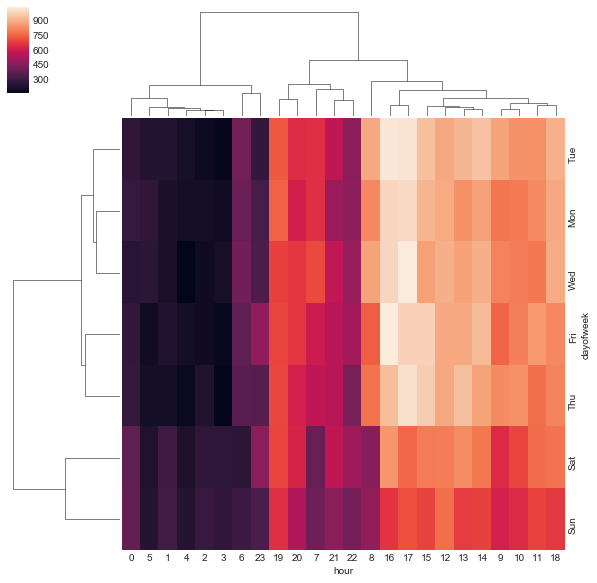

In [219]:
sns.clustermap(dayhour)

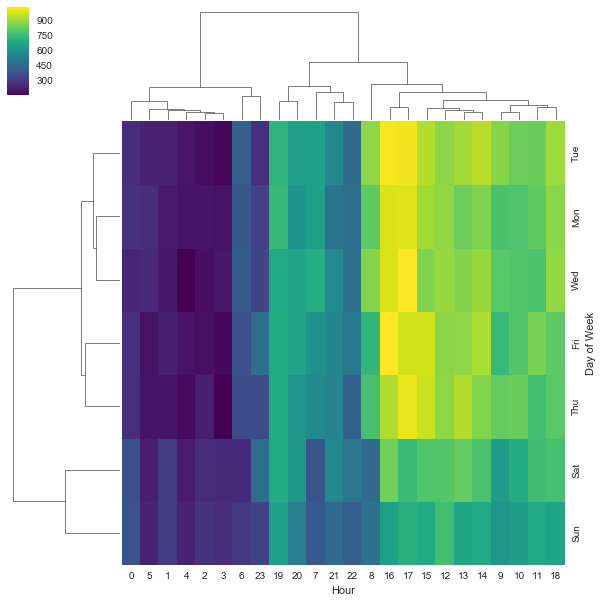

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [222]:
daymonth = df.groupby(['dayofweek','month'])['reason'].count().unstack()
daymonth

month        1     2     3     4     5     6     7     8     12
dayofweek                                                      
Fri        1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon        1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat        2291  1441  1266  1734  1444  1388  1695  1099   978
Sun        1960  1229  1102  1488  1424  1333  1672  1021   907
Thu        1584  1596  1900  1601  1590  2065  1646  1230  1266
Tue        1973  1753  1884  1430  1918  1676  1670  1612  1234
Wed        1700  1903  1889  1517  1538  2058  1717  1295  1262

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266

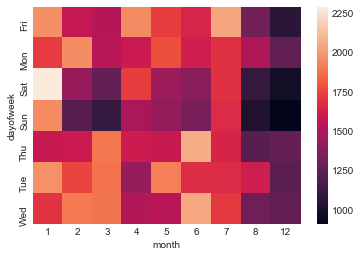

In [223]:
sns.heatmap(daymonth)

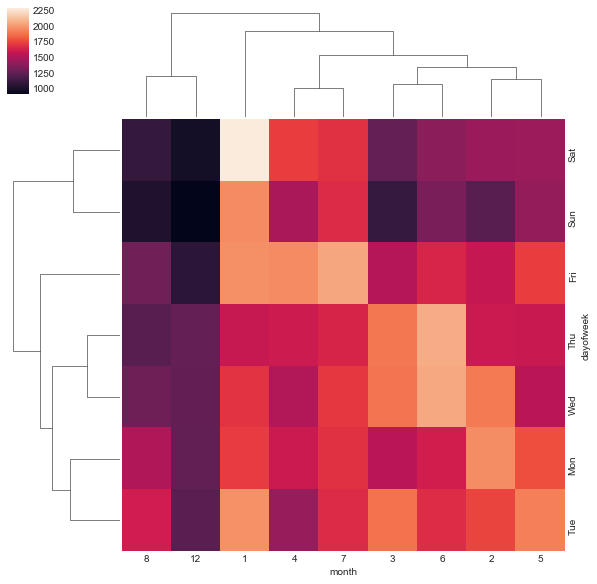

In [224]:
sns.clustermap(daymonth)

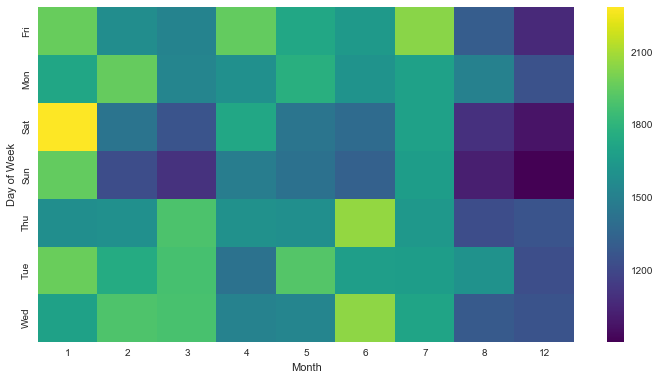

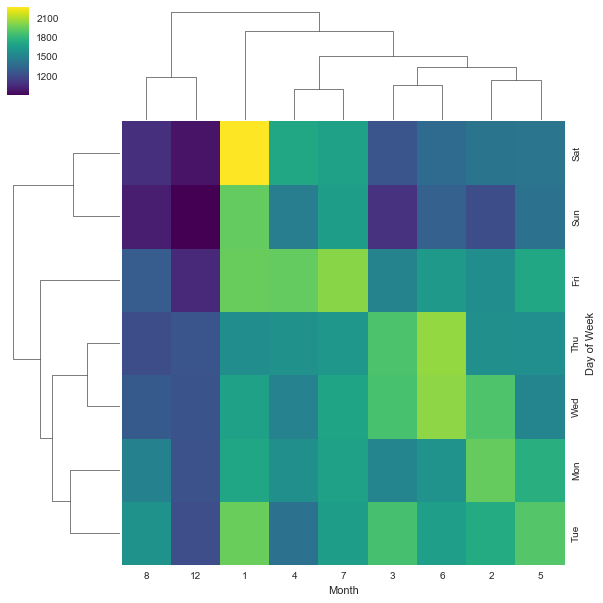

**Continue exploring the Data however you see fit!**
# Great Job!